# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [70]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [71]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [73]:
# Create the Urban city DataFrame.

urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
urban_cities_df.head()


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [74]:
# Create the Suburban and Rural city DataFrames.
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]


## Deliverable 1: Get a Summary DataFrame 

In [75]:
#  1. Get the total rides for each city type

total_rides = pyber_data_df.groupby(["type"]).count()["ride_id"]
total_rides.head()


type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [76]:
# 2. Get the TOTAL drivers for each city type
total_drivers = pyber_data_df.groupby(["type"]).sum()["driver_count"] 
total_drivers.head()

type
Rural         537
Suburban     8570
Urban       59602
Name: driver_count, dtype: int64

In [64]:
#  3. Get the total amount of fares for each city type

total_fares = pyber_data_df.groupby(["type"]).sum()["fare"]
total_fares.head()

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [25]:
#  4. Get the average fare per ride for each city type. 

average_fares_per_ride_by_type = pyber_data_df.set_index(['type']).groupby(['type']).sum()['fare'] / pyber_data_df.set_index(['type']).groupby(['type']).count()['fare']
average_fares_per_ride_by_type


type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
Name: fare, dtype: float64

In [22]:
# 5. Get the average fare per driver for each city type. 

average_fares_per_driver_by_type = pyber_data_df.set_index(['type']).groupby(['type']).sum()['fare'] / city_data_df.set_index(['type']).groupby(['type']).sum()['driver_count']
average_fares_per_driver_by_type

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [65]:
#  6. Create a PyBer summary DataFrame. 
#  8. Format the columns.

pyber_summary_df = pd.DataFrame(
          {"Total Rides": total_rides.map("{:,}".format),
          "Total Drivers": total_drivers.map("{:,}".format),
          "Total Fares": total_fares.map("${:,.2f}".format),
          "Average Fare per Ride": average_fares_per_ride_by_type.map("${:,.2f}".format),
          "Average Fare per Driver": average_fares_per_driver_by_type.map("${:,.2f}".format)})

#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,537,"$4,327.93",$34.62,$55.49
Suburban,625,"8,570","$19,356.33",$30.97,$39.50
Urban,"1,625","59,602","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [37]:
# 1. Read the merged DataFrame
pyber_data_df

,city,fare,ride_id,driver_count,type
date,,,,,
2019-01-14 10:14:22,Lake Jonathanshire,13.83,5739410935873,5,Urban
2019-03-04 18:24:09,South Michelleport,30.24,2343912425577,72,Urban
2019-02-24 04:29:00,Port Samanthamouth,33.44,2005065760003,57,Urban
2019-02-10 23:22:03,Rodneyfort,23.44,5149245426178,34,Urban
2019-03-06 04:28:35,South Jack,34.58,3908451377344,46,Urban
...,...,...,...,...,...
2019-04-29 17:04:39,Michaelberg,13.38,8550365057598,6,Rural
2019-01-30 00:05:47,Lake Latoyabury,20.76,9018727594352,2,Rural
2019-02-10 21:03:50,North Jaime,11.11,2781339863778,1,Rural


In [50]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.

pyber_data_df_byType = pd.DataFrame(pyber_data_df.groupby(['type', 'date']).sum()['fare'])


In [53]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()

pyber_data_df_byTypes = pyber_data_df_byType.reset_index()
pyber_data_df_byTypes

,type,date,fare
0,Rural,2019-01-01 09:45:36,43.69
1,Rural,2019-01-02 11:18:32,52.12
2,Rural,2019-01-03 19:51:01,19.90
3,Rural,2019-01-04 03:31:26,24.88
4,Rural,2019-01-06 07:38:40,47.33
...,...,...,...
2370,Urban,2019-05-08 04:20:00,21.99
2371,Urban,2019-05-08 04:39:49,18.45
2372,Urban,2019-05-08 07:29:01,18.55
2373,Urban,2019-05-08 11:38:35,19.77


In [52]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 

pyber_pivot = pd.pivot_table(pyber_data_df_byTypes, values="fare", index=["date"], columns=['type'])
pyber_pivot

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:49,NaN,NaN,18.45
2019-05-08 07:29:01,NaN,NaN,18.55


In [54]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.

pyber_pivot_df = pyber_pivot.loc['2019-01-01':'2019-04-29']
pyber_pivot_df.head()

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75


In [56]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)

pyber_pivot_df.index = pd.to_datetime(pyber_pivot_df.index)

In [58]:
# 7. Check that the datatype for the index is datetime using df.info()
pyber_pivot_df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  573 non-null    float64
 2   Urban     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6 KB


In [59]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
sum_fare_JanThruApril_byWeek_df = pyber_pivot_df.resample('W').sum()

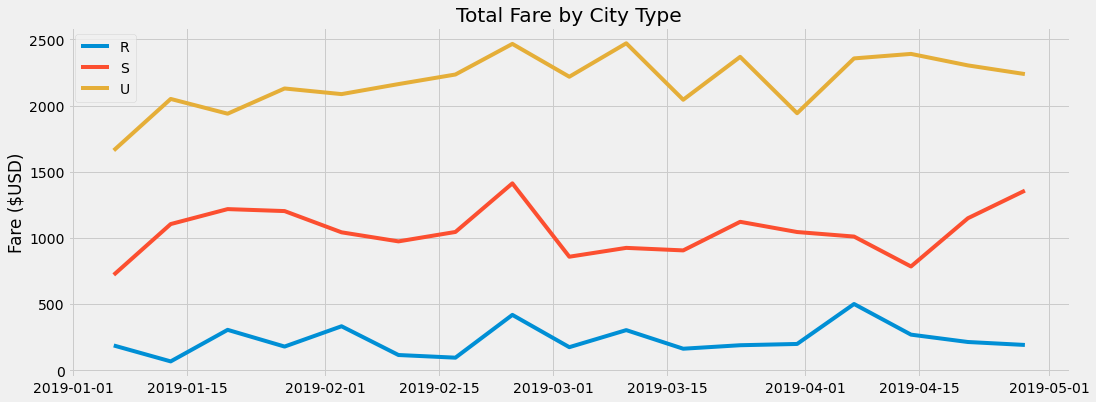

In [90]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

# Create the plot with ax.plt()
fig, ax = plt.subplots(figsize=(16,6))
ax.plot(sum_fare_JanThruApril_byWeek_df)

# Annotate the y-axis label using object-oriented interface method
ax.set_ylabel('Fare ($USD)')

# Annotate the Title using object-oriented interface method
ax.set_title("Total Fare by City Type")

# Annotate a legend
ax.legend("RSU")